# Lab 1 Data Visualisation on Python with Matplotlib

## 1 Generate data according to the following code

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Union
n=500
df=pd.DataFrame({
    'код респондента':np.random.randint(1, np.int32(0.33*n),size=n),
    'дата опроса':np.random.choice(['2020-01-31','2021-01-31','2022-02-03','2019-06-06'],size=n),
    'пол':np.random.choice(['муж','жен'],size=n,p=(0.35,0.65)),
    'образование':np.random.choice(['высшее','незаконченное высшее','среднее','среднее специальное'],p=(0.1,0.1,0.4,0.4),size=n),
    'социальный статус':np.random.choice(['холост/незамужем','женат/замужем','вдовец/вдова','разведен/разведена'],p=(0.45,0.05,0.05,0.45),size=n),
    'возраст':np.rint(np.random.normal(45,15,size=n)),
    'рост':list(np.rint(np.random.normal(160,20,size=int(n*0.9))))+list(np.rint(np.random.normal(180,20,size=n-int(n*0.9))))
})
df['вес']=df['рост']-(100+(df['рост']-100)/20)+np.rint(np.random.normal(10,2,size=n))

## 2.1 Create a pie chart describing the frequencies of "education". Add a name to the chart.

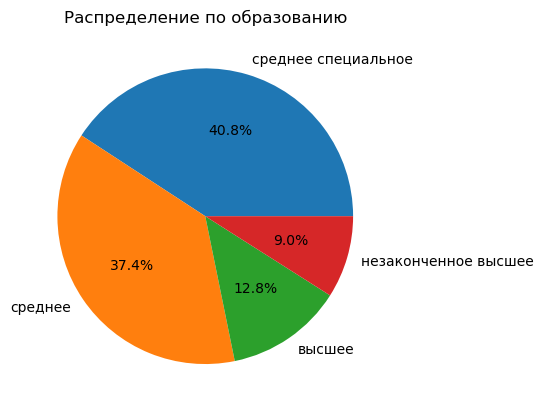

In [176]:
plt.pie(df['образование'].value_counts(),labels=df['образование'].value_counts().index,autopct='%1.1f%%')
plt.title('Распределение по образованию')
plt.show();


## 2.2 Create a scatter plot describing the relationship between "height" and "weight". Add axis labels. Add a grid.

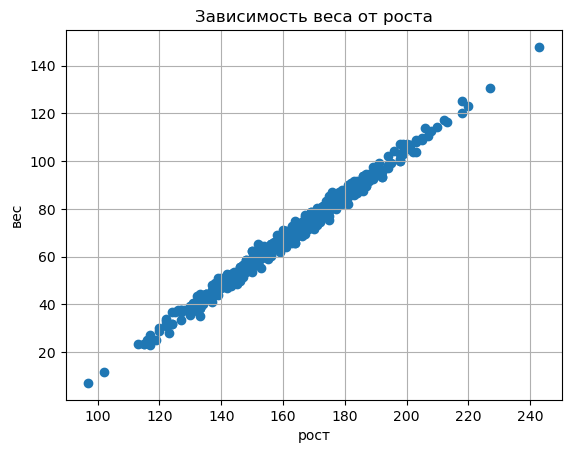

In [177]:
plt.scatter(df['рост'],df['вес'])
plt.title('Зависимость веса от роста')
plt.xlabel('рост')
plt.ylabel('вес')
plt.grid()
plt.show();

## 2.3 Create a box-and-whiskers chart describing the distribution of "height". Add values and names of statistics to the chart.

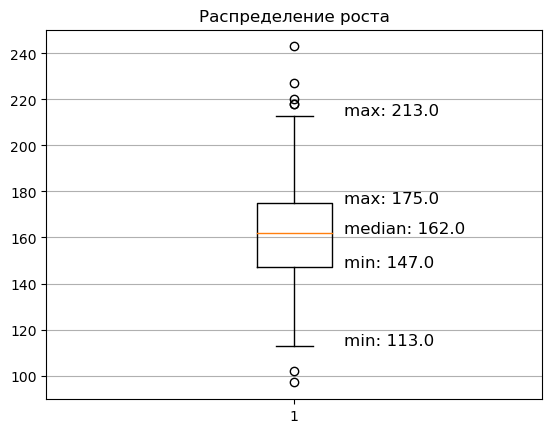

In [178]:
def add_description(ax, x, y, title: str, bias: float):
    ax.text(x+bias, y, title + ': ' + str(y), fontsize=12)

X = 1
ax = plt.subplot()
box = ax.boxplot(df['рост'])
add_description(ax, X, box['medians'][0].get_ydata()[0], 'median', 0.1)
add_description(ax, X, box['whiskers'][0].get_ydata()[0], 'min', 0.1)
add_description(ax, X, box['whiskers'][1].get_ydata()[0], 'max', 0.1)
add_description(ax, X, box['caps'][0].get_ydata()[0], 'min', 0.1)
add_description(ax, X, box['caps'][1].get_ydata()[0], 'max', 0.1)
ax.title.set_text('Распределение роста')
ax.grid(axis='y')
plt.show();

## 2.4 Create a histogram describing the frequency of values of the variable "social status". Add captions of frequency values to the chart. 3.

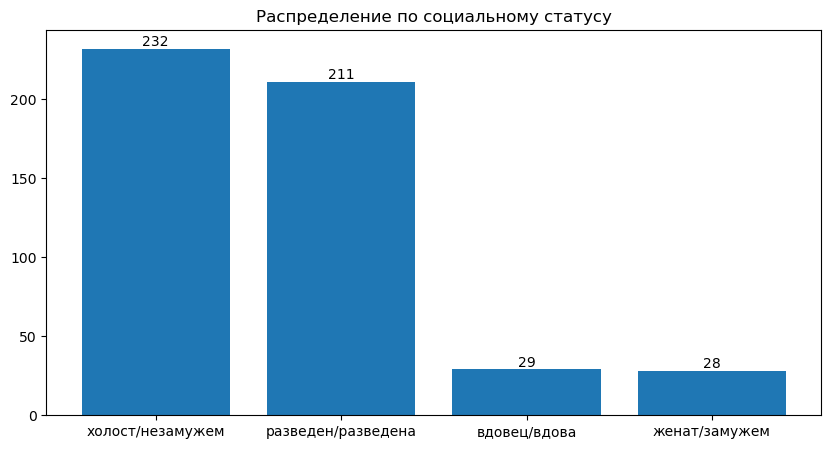

In [179]:
plt.figure(figsize=(10, 5))
bar = plt.bar(df['социальный статус'].value_counts().index, df['социальный статус'].value_counts())
plt.bar_label(bar)
plt.title('Распределение по социальному статусу')
plt.show();

## 3. Add a trend line (linear regression) to chart 2.2.

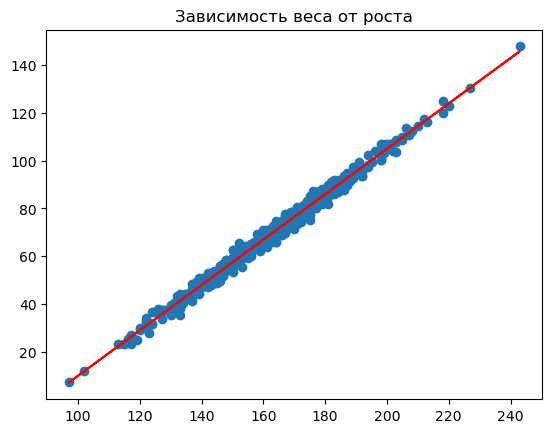

In [180]:
import statsmodels.api as sm
model = sm.OLS(df['вес'], sm.add_constant(df['рост'])).fit()
plt.scatter(df['рост'],df['вес'])
plt.title('Зависимость веса от роста')
plt.plot(df['рост'], model.params['рост'] * df['рост'] + model.params['const'], color='red')
plt.show();

## 4. Create a single graph, using subplots, using the graphs in step 2. Using the trends from step 2

<Figure size 1000x500 with 0 Axes>

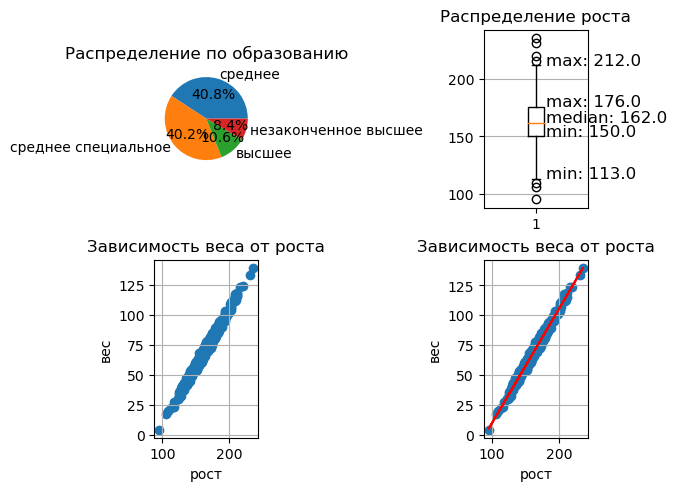

In [ ]:
plt.figure(figsize=(10, 5))
fig, ax = plt.subplots(2, 2, layout="constrained")

ax[0, 0].pie(df['образование'].value_counts(),labels=df['образование'].value_counts().index,autopct='%1.1f%%')
ax[0, 0].title.set_text('Распределение по образованию')

ax[1, 0].scatter(df['рост'],df['вес'])
ax[1, 0].title.set_text('Зависимость веса от роста')
ax[1, 0].set_xlabel('рост')
ax[1, 0].set_ylabel('вес')
ax[1, 0].grid()

box = ax[0, 1].boxplot(df['рост'])
add_description(ax[0, 1], X, box['medians'][0].get_ydata()[0], 'median', 0.1)
add_description(ax[0, 1], X, box['whiskers'][0].get_ydata()[0], 'min', 0.1)
add_description(ax[0, 1], X, box['whiskers'][1].get_ydata()[0], 'max', 0.1)
add_description(ax[0, 1], X, box['caps'][0].get_ydata()[0], 'min', 0.1)
add_description(ax[0, 1], X, box['caps'][1].get_ydata()[0], 'max', 0.1)
ax[0, 1].title.set_text('Распределение роста')
ax[0, 1].grid(axis='y')

ax[1, 1].scatter(df['рост'],df['вес'])
ax[1, 1].title.set_text('Зависимость веса от роста')
ax[1, 1].set_xlabel('рост')
ax[1, 1].set_ylabel('вес')
ax[1, 1].grid()
ax[1, 1].plot(df['рост'], model.params['рост'] * df['рост'] + model.params['const'], color='red')
plt.show();

## 5. Create a heat map, according to the correlation matrix between "height" and "weight".

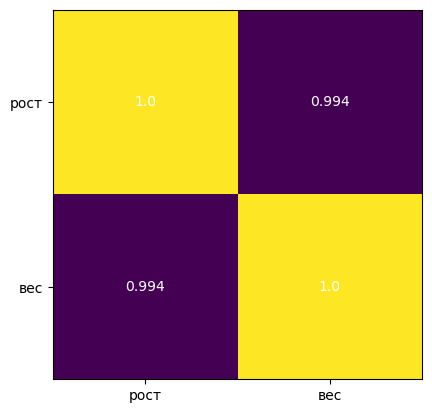

In [ ]:
df_corr = df[['рост', 'вес']].corr()
plt.imshow(df_corr, interpolation='nearest',)
# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(df_corr.columns)), df_corr.columns)
plt.yticks(np.arange(len(df_corr.columns)), df_corr.columns)
# Loop over data dimensions and create text annotations.
for i in range(len(df_corr.columns)):
    for j in range(len(df_corr.columns)):
        text = plt.text(j, i, np.round(df_corr.iloc[i, j], 3), ha="center", va="center", color="w")

## 6. Add a sex disaggregation to the graph in 2.3

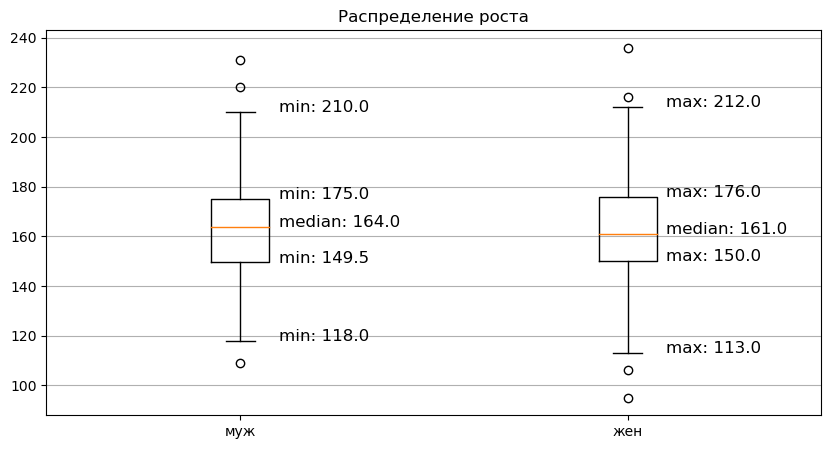

In [ ]:
# Add a sex disaggregation to the graph
plt.figure(figsize=(10, 5))
ax = plt.subplot()
box = ax.boxplot([df[df['пол'] == 'муж']['рост'], df[df['пол'] == 'жен']['рост']])
ax.set_xticklabels(['муж', 'жен'])
add_description(ax, 1, box['medians'][0].get_ydata()[0], 'median', 0.1)
add_description(ax, 2, box['medians'][1].get_ydata()[0], 'median', 0.1)
add_description(ax, 1, box['whiskers'][0].get_ydata()[0], 'min', 0.1)
add_description(ax, 1, box['whiskers'][1].get_ydata()[0], 'min', 0.1)
add_description(ax, 2, box['whiskers'][2].get_ydata()[0], 'max', 0.1)
add_description(ax, 2, box['whiskers'][3].get_ydata()[0], 'max', 0.1)
add_description(ax, 1, box['caps'][0].get_ydata()[0], 'min', 0.1)
add_description(ax, 1, box['caps'][1].get_ydata()[0], 'min', 0.1)
add_description(ax, 2, box['caps'][2].get_ydata()[0], 'max', 0.1)
add_description(ax, 2, box['caps'][3].get_ydata()[0], 'max', 0.1)
ax.title.set_text('Распределение роста')
ax.grid(axis='y')
plt.show();

## 7. Create a heat map corresponding to the change in the mean value of the variable "weight" as a function of "gender" and "social status".

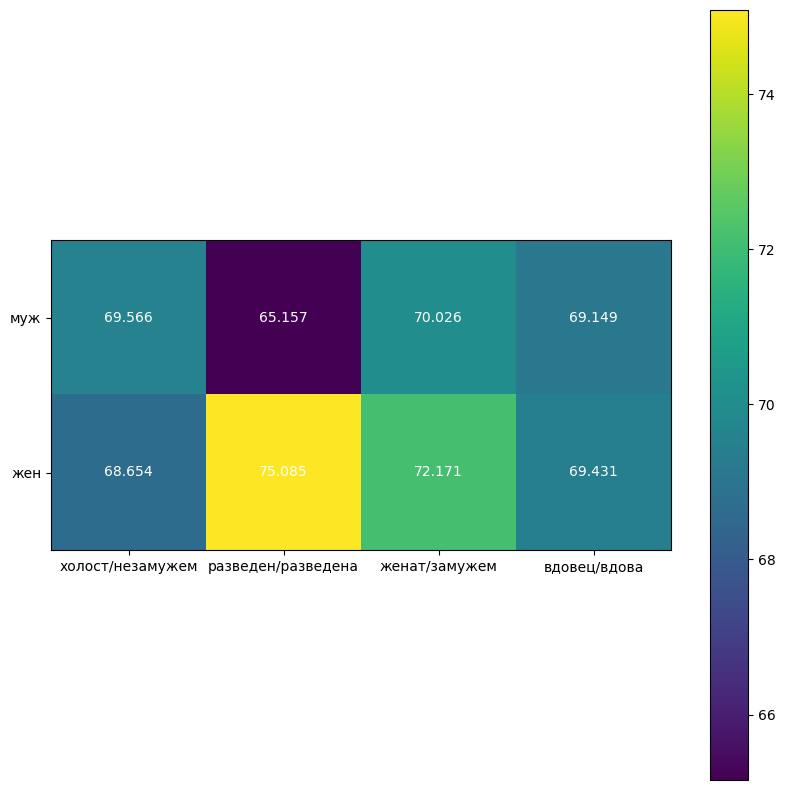

In [ ]:
plt.figure(figsize=(10, 10))
#Create a heat map corresponding to the change in the mean value of the variable "вес" as a function of "пол" and "социальный статус"
plt.imshow(df.groupby(['пол', 'социальный статус'])['вес'].mean().unstack(), interpolation='nearest')
# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(df['социальный статус'].unique())), df['социальный статус'].unique())
plt.yticks(np.arange(len(df['пол'].unique())), df['пол'].unique())
# Show colorbar
plt.colorbar()
# Loop over data dimensions and create text annotations.
for i in range(len(df['пол'].unique())):
    for j in range(len(df['социальный статус'].unique())):
        text = plt.text(j, i, np.round(df.groupby(['пол', 'социальный статус'])['вес'].mean().unstack().iloc[i, j], 3), ha="center", va="center", color="w")
plt.show();

## 8. Create a box-and-whisker chart matrix for the variables "height", "weight" as a function of depending on the variable "gender".

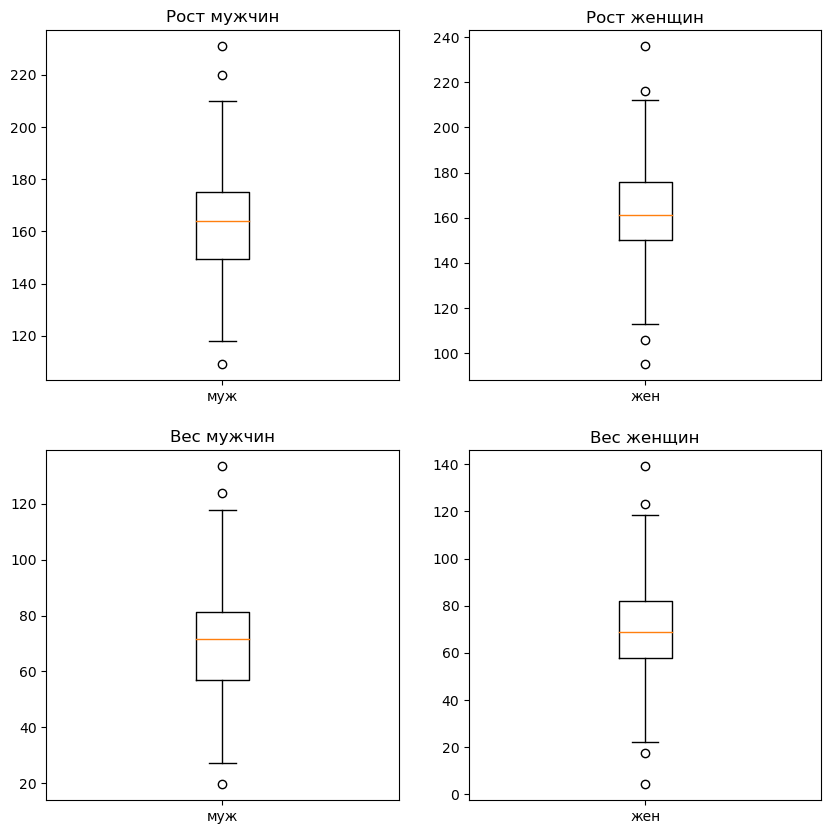

In [ ]:
# Create a box-and-whisker chart matrix for the variables "рост", "вес" as a function of depending on the variable "пол".
# The chart matrix should be 2x2.
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].boxplot([df[df['пол'] == 'муж']['рост']])
ax[0, 0].set_xticklabels(['муж'])
ax[0, 0].set_title('Рост мужчин')
ax[0, 1].boxplot([df[df['пол'] == 'жен']['рост']])
ax[0, 1].set_xticklabels(['жен'])
ax[0, 1].set_title('Рост женщин')
ax[1, 0].boxplot([df[df['пол'] == 'муж']['вес']])
ax[1, 0].set_xticklabels(['муж'])
ax[1, 0].set_title('Вес мужчин')
ax[1, 1].boxplot([df[df['пол'] == 'жен']['вес']])
ax[1, 1].set_xticklabels(['жен'])
ax[1, 1].set_title('Вес женщин')
plt.show();


## 9. Create a graph with two axes - for empirical frequency density of variables "social status" and "education".

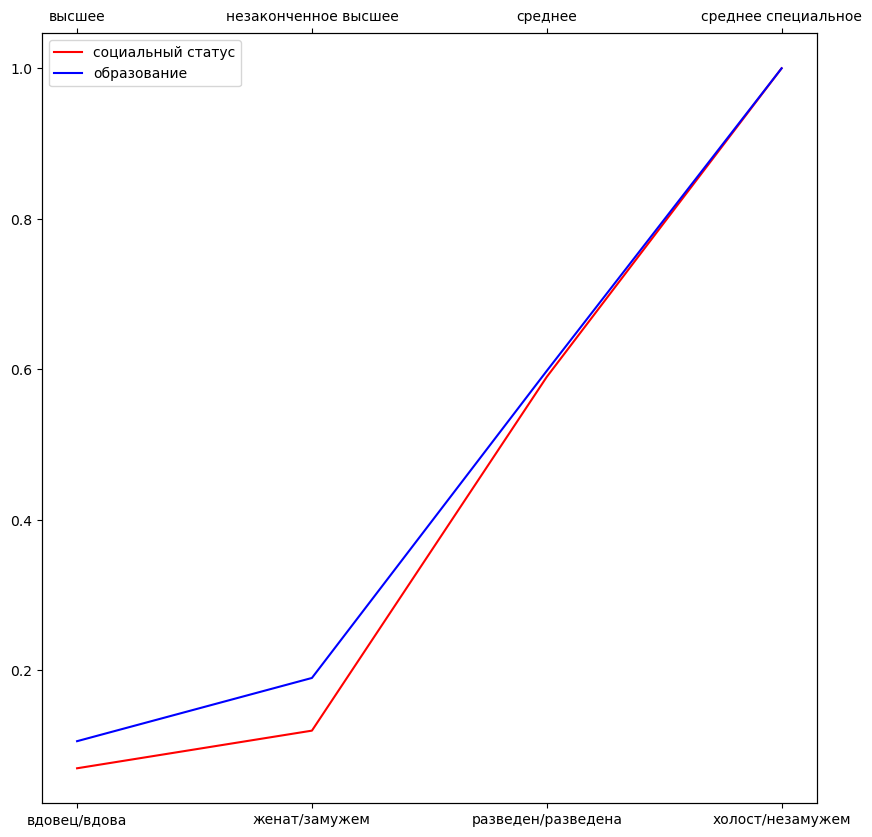

In [ ]:
# Create a graph with two axes - for empirical frequency density of variables "социальный статус" and "образование".
plt.figure(figsize=(10, 10))
ax1 = plt.subplot()
ax2 = ax1.twiny()

line1 = ax1.plot(df['социальный статус'].value_counts().sort_index().cumsum() / df['социальный статус'].count(), label='социальный статус', color='red')
line2 = ax2.plot(df['образование'].value_counts().sort_index().cumsum() / df['образование'].count(), label='образование', color='blue')

lns = line1+line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.show();

## 10. Create a line chart for the variables "height" and "weight".

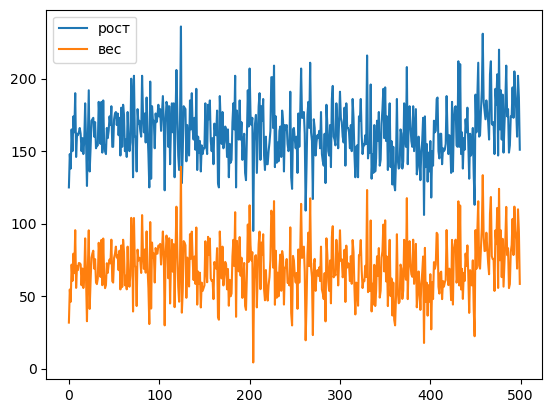

In [ ]:
# Create a line chart for the variables "рост" and "вес"
plt.plot(df['рост'].sort_index(), label='рост')
plt.plot(df['вес'].sort_index(), label='вес')
plt.legend()
plt.show();

<AxesSubplot:>

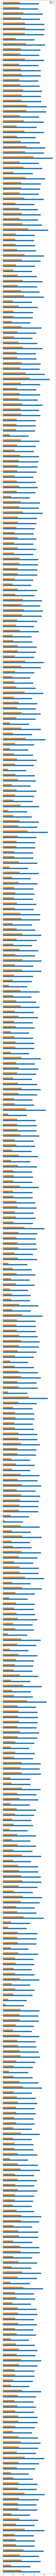

In [182]:
df1 = pd.DataFrame(df[['рост', 'вес']])
df1.plot.barh(figsize=(10, len(df1)))